In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n
import pickle

[46259.48454575]
[44602.55439531]
[46259.48454575]


C:\Users\PMLS\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


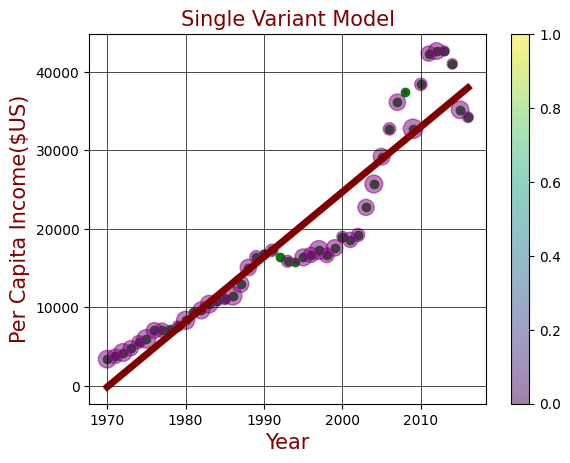

In [42]:
path="C:\\Users\\PMLS\\Desktop\\Data_Sets\\canada_per_capita_income.csv"
df=pd.read_csv(path) 
plt.xlabel("Year",fontsize=15,color='maroon')
plt.ylabel("Per Capita Income($US)",fontsize=15,color='maroon')
#plt.subplots_adjust(bottom=0.2)
plt.title("Single Variant Model",fontsize=15,color='maroon')
plt.scatter(df["year"],df["per capita income (US$)"],color='green')
Linear=linear_model.LinearRegression()
X= df["year"].values.reshape(-1, 1)
y = df["per capita income (US$)"].values
Linear.fit(X,y) 
Predict=Linear.predict([[2026]])
print(Predict)
size=5*np.random.randint(40,size=df['per capita income (US$)'].size)
#colors=np.random.randint(100,size=df['per capita income (US$)'].size)
plt.scatter(df["year"],df["per capita income (US$)"],c='purple',s=size,alpha=0.5)
plt.plot(df['year'],Linear.predict(df[['year']]),color='maroon', linewidth=5)
coef=Linear.coef_
Intercept=Linear.intercept_ 
Capita_per_Year=coef*2024+Intercept 
print(Capita_per_Year) 
with open('model_pickle','wb') as f:
    pickle.dump(Linear,f)
with open('model_pickle','rb') as f:
    Load=pickle.load(f)
    Pickle_Prediction=Load.predict([[2026]])
    print(Pickle_Prediction)
    plt.grid(color='black',linewidth=0.5)
    plt.colorbar()
    plt.show()

        
 


In [44]:
path="C:\\Users\\PMLS\\Desktop\\Data_Sets\\hiring.csv"
df=pd.read_csv(path)
Exp=df["experience"]
def convert_word_number(Exp):
      try: 
         return w2n.word_to_num(Exp)
      except:
          return None
df['experience']=df['experience'].apply(convert_word_number)
df["experience"].fillna(0,inplace=True)
Median=df["test_score(out of 10)"].median()
df["test_score(out of 10)"].fillna(Median,inplace=True)
Model=linear_model.LinearRegression()
Model.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])
Q1=Model.predict([[2,9,6]])
print("Salary of a person having 2 years experience, 9 test score and 6 interview score:",Q1)
Q2=Model.predict([[12,10,10]])
print("Salary of a person having 12 years experience, 10 test score and 10 interview score:",Q2)
    
     




Salary of a person having 2 years experience, 9 test score and 6 interview score: [53205.96797671]
Salary of a person having 12 years experience, 10 test score and 10 interview score: [92002.18340611]


C:\Users\PMLS\AppData\Local\Temp\ipykernel_10880\3893746566.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["experience"].fillna(0,inplace=True)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_10880\3893746566.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe